In [1]:
using DataFrames
using Plots
using Polynomials
using Printf
using QuadGK

<a href="https://www.icsr.agh.edu.pl/~mownit/pdf/06_kwadratury.pdf"> Wykład </a>

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [2]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
(xp,a)=gauss(Float64,7)


([-0.949108, -0.741531, -0.405845, 0.0, 0.405845, 0.741531, 0.949108], [0.129485, 0.279705, 0.38183, 0.417959, 0.38183, 0.279705, 0.129485])

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [3]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [4]:
function legendre(n)
        if n == 0
            return Poly([1])
        elseif n == 1
            return Poly([0,1])
        else
        return (2*n-1) / n * Poly([0,1]) * legendre(n-1) - (n-1) / n * legendre(n-2)
        end;
    end;

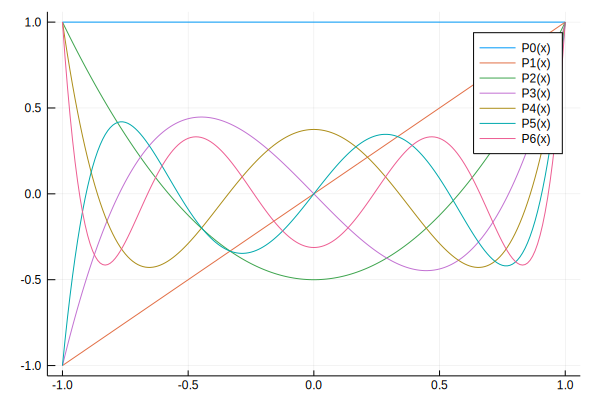

In [5]:
x = collect(-1:0.01:1)
P = Dict(n => legendre(n) for n in range(0,6))
    plot(x,P[0](x), label="P0(x)")
    plot!(x,P[1](x), label="P1(x)")
    plot!(x,P[2](x), label="P2(x)")
    plot!(x,P[3](x), label="P3(x)")
    plot!(x,P[4](x), label="P4(x)")
    plot!(x,P[5](x), label="P5(x)")
    plot!(x,P[6](x), label="P6(x)")

In [6]:
print("Legendre P2(x): ", P[2], "\n   Legendre roots: ", roots(P[2]), 
      "\n   Gauss roots: ", gauss(2)[1], "\n\n")
print("Legendre P3(x): ", P[3], "\n   Legendre roots: ", roots(P[3]), 
      "\n   Gauss roots: ", gauss(3)[1], "\n\n")
print("Legendre P4(x): ", P[4], "\n   Legendre roots: ", roots(P[4]), 
      "\n   Gauss roots: ", gauss(4)[1], "\n\n")

Legendre P2(x): Poly(-0.5 + 1.5*x^2)
   Legendre roots: [-0.57735, 0.57735]
   Gauss roots: [-0.57735, 0.57735]

Legendre P3(x): Poly(-1.5*x + 2.5*x^3)
   Legendre roots: [-0.774597, 0.774597, 0.0]
   Gauss roots: [-0.774597, 0.0, 0.774597]

Legendre P4(x): Poly(0.375 - 3.75*x^2 + 4.375*x^4)
   Legendre roots: [-0.861136, 0.861136, -0.339981, 0.339981]
   Gauss roots: [-0.861136, -0.339981, 0.339981, 0.861136]



### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [7]:
function count_integral_on_minus_one_to_one_with_gauss_method(f, k)
    (xs, a) = gauss(k)
    return sum(a .* f.(xs))
end

count_integral_on_minus_one_to_one_with_gauss_method (generic function with 1 method)

In [8]:
f(x) = 25*x^24+3*x^2+1     # Integral on [-1,1] is equal to 6
exp_res = 6
ones_gauss_results = DataFrame(k=Int[], Result=String[], Absolute_error=String[], Relative_error=String[])
println("Integral of f(x) = 25*x^24+3*x^2+1, on [-1,1] is equal to ", exp_res, ".\n\n", "Gauss [-1,1] results:\n")
for k in range(1,30)
    res = count_integral_on_minus_one_to_one_with_gauss_method(f, k)
    push!(ones_gauss_results, 
            [k, 
             @sprintf("%.10E", res), 
             @sprintf("%.10E", abs(exp_res-res)), 
             @sprintf("%.10E", abs(exp_res-res)/exp_res)]
    )
end;
ones_gauss_results

Integral of f(x) = 25*x^24+3*x^2+1, on [-1,1] is equal to 6.

Gauss [-1,1] results:



,k,Result,Absolute_error,Relative_error
,Int64,String,String,String
1,1,2.0000000000E+00,4.0000000000E+00,6.6666666667E-01
2,2,4.0000940838E+00,1.9999059162E+00,3.3331765270E-01
3,3,4.0604661760E+00,1.9395338240E+00,3.2325563733E-01
4,4,4.4809431266E+00,1.5190568734E+00,2.5317614557E-01
5,5,5.1136102480E+00,8.8638975201E-01,1.4773162534E-01
6,6,5.6005145713E+00,3.9948542869E-01,6.6580904782E-02
7,7,5.8589473747E+00,1.4105262534E-01,2.3508770890E-02
8,8,5.9614480023E+00,3.8551997657E-02,6.4253329428E-03
9,9,5.9920965031E+00,7.9034969067E-03,1.3172494844E-03


#### Wniosek: Dla wielomianu stopnia 24 kwadratura zaczyna być dokładna dla $k\ge13$
Różnica między $k\ge13$ i $k=12$ jest znacząca: dla $k\ge13$ błąd wgzlędny jest mniejszy od $1\cdot 10^{-14}$ (rzędu $10^{-15}$), podczas gdy dla $k=12$ błąd względny równy $7.65\cdot 10^{-7}$ jest większy o dobre kilka rzędów wielkości!

Zatem w tym przypadku zachodzi przedstawione poniżej twierdzenie Gaussa, ponieważ dla $k=12$ kwadratura Gaussa
jest dokładna dla co najwyżej stopnia $2\cdot12-1 = 23$, natomiast dla $k\ge13$ mamy już dokładność dla $n=24$.
### Twierdzenie o stopniu dokładności kwadratury Gaussa
    Teza:
        Kwadratura ma stopień dokładności 2n − 1 (dla n-punktowej kwadratury).
        Innymi słowy jest dokładna dla wielomianu:
            P(x) = Q(x) · ϕn(x) + R(x) ; Q, R−stopnia < n.

### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [9]:
function count_integral_with_gauss_method(f, a, b, k=10)
    (xi, ai) = gauss(k)
    return sum(ai .* (b-a)/2 .* f.((b-a)/2 * xi + [(b+a)/2 for i in range(0,k-1)]))
end

count_integral_with_gauss_method (generic function with 2 methods)

In [10]:
ext_gauss_results = DataFrame(k=Int[], Result=String[], Absolute_error=String[], Relative_error=String[])
f(x) = 25*x^24+3*x^2+1     # Integral on [-1,2] is equal to F(2)-F(-1) = 33554442+3 = 33554445, F(x) = x^25+x^3+x
exp_res = 33554445
a = -1
b = 2
println("Integral of f(x) = 25*x^24+3*x^2+1, on [", a, ",", b, "] is equal to ", exp_res, ".\n\n",
        "Extended Gauss results:\n")
for k in range(1,30)
    res = count_integral_with_gauss_method(f, a, b, k)
    push!(ext_gauss_results, 
            [k, 
             @sprintf("%.10E", res), 
             @sprintf("%.10E", abs(exp_res-res)), 
             @sprintf("%.10E", abs(exp_res-res)/exp_res)]
    )
end
ext_gauss_results

Integral of f(x) = 25*x^24+3*x^2+1, on [-1,2] is equal to 33554445.

Extended Gauss results:



,k,Result,Absolute_error,Relative_error
,Int64,String,String,String
1,1,5.2500044703E+00,3.3554439750E+07,9.9999984354E-01
2,2,6.6852838623E+04,3.3487592161E+07,9.9800763092E-01
3,3,4.1043652846E+06,2.9450079715E+07,8.7768042998E-01
4,4,1.5625127116E+07,1.7929317884E+07,5.3433510476E-01
5,5,2.5885228772E+07,7.6692162279E+06,2.2856036593E-01
6,6,3.1161551959E+07,2.3928930411E+06,7.1313742221E-02
7,7,3.3012855408E+07,5.4158959197E+05,1.6140621368E-02
8,8,3.3468293444E+07,8.6151555967E+04,2.5675154504E-03
9,9,3.3545370561E+07,9.0744387830E+03,2.7043924532E-04


#### Wniosek: Dla wielomianu stopnia 24 kwadratura zaczyna być dokładna dla $k\ge13$
Różnica między $k\ge13$ i $k=12$ jest znacząca: dla $k\ge13$ błąd wgzlędny jest mniejszy od $1\cdot 10^{-14}$ (rzędu $10^{-15}$), podczas gdy dla $k=12$ błąd względny równy $3.45\cdot 10^{-9}$ jest większy o kilka rzędów wielkości!

Zatem również w tym przypadku zachodzi twierdzenie Gaussa, ponieważ dla $k=12$ kwadratura Gaussa
jest dokładna dla co najwyżej stopnia $2\cdot12-1 = 23$, natomiast dla $k\ge13$ mamy już dokładność dla $n=24$.

### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> quadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności
 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [11]:
function print_analysis_of_quadgk(f, a, b, exp_res)
    (res, err) = quadgk(f, a, b)
    println("Integral on [", a, ",", b, "] is equal to ", exp_res, 
        "\n  quadgk result: ", @sprintf("%.12E", res), 
        ", quadgk max possible error: ", @sprintf("%.12E", err), 
        "\n  absolute error: ", @sprintf("%.12E", abs(exp_res-res)), 
        ", relative error: ", @sprintf("%.12E", abs(exp_res-res)/exp_res),
        "\n\n")
end

print_analysis_of_quadgk (generic function with 1 method)

In [12]:
f(x) = 25*x^24+3*x^2+1     # Integral is equal to F(x) = x^25+x^3+x
println("Counting integrals of f(x) = 25*x^24+3*x^2+1 (F(x) = x^25+x^3+x):\n\n")
print_analysis_of_quadgk(f, -1, 1, 6)          # Integral on [-1,1] is equal to F(1)-F(-1) = 3+3 = 6
print_analysis_of_quadgk(f, -1, 2, 33554445)   # Integral on [-1,2] is equal to F(2)-F(-1) = 33554442+3 = 33554445

Counting integrals of f(x) = 25*x^24+3*x^2+1 (F(x) = x^25+x^3+x):


Integral on [-1,1] is equal to 6
  quadgk result: 6.000000000000E+00, quadgk max possible error: 1.942415117639E-10
  absolute error: 0.000000000000E+00, relative error: 0.000000000000E+00


Integral on [-1,2] is equal to 33554445
  quadgk result: 3.355444500000E+07, quadgk max possible error: 1.743483802578E-02
  absolute error: 7.450580596924E-09, relative error: 2.220445188983E-16




In [13]:
standard_gauss(x) =  1 / sqrt(2*pi) * Base.MathConstants.e^(-x^2/2)
print_analysis_of_quadgk(standard_gauss, -Inf, Inf, 1)

Integral on [-Inf,Inf] is equal to 1
  quadgk result: 1.000000000003E+00, quadgk max possible error: 1.439558494150E-08
  absolute error: 3.258282532670E-12, relative error: 3.258282532670E-12




### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie 
w zaleznosci od ilosci potrzebnych przedziałów  dla przykładowego wielomianu.

In [14]:
function simpson_integral(f, a, b, n=100)
    res = 0
    h = (b-a) / n
    for i in range(0,n-1)
        xi = a + i*h
        res += 1/6 * h * (f(xi) + 4 * f(xi+h/2) + f(xi+h))
    end
    return res
end

simpson_integral (generic function with 2 methods)

In [15]:
simpson_f_results = DataFrame(n=Int[], Result=String[], Absolute_error=String[], Relative_error=String[])
f(x) = 25*x^24+3*x^2+1     # Integral on (-1,2) is equal to F(2)-F(-1) = 33554442+3 = 33554445, F(x) = x^25+x^3+x
exp_res = 33554445
a = -1
b = 2
println("Integral of f(x) = 25*x^24+3*x^2+1, on [", a, ",", b, "] is equal to ", exp_res, ".\n\n",
"Simpson results:\n")
min_n = 10
max_n = 200
for n in range(min_n,max_n)
    res = simpson_integral(f, a, b, n)
    push!(simpson_f_results, 
            [n, 
             @sprintf("%.10E", res), 
             @sprintf("%.10E", abs(exp_res-res)), 
             @sprintf("%.10E", abs(exp_res-res)/exp_res)]
    )
end
print(simpson_f_results)

Integral of f(x) = 25*x^24+3*x^2+1, on [-1,2] is equal to 33554445.

Simpson results:

191×4 DataFrame
│ Row │ n     │ Result           │ Absolute_error   │ Relative_error   │
│     │ Int64 │ String           │ String           │ String           │
├─────┼───────┼──────────────────┼──────────────────┼──────────────────┤
│ 1   │ 10    │ 3.4929085830E+07 │ 1.3746408298E+06 │ 4.0967473304E-02 │
│ 2   │ 11    │ 3.4535122231E+07 │ 9.8067723066E+05 │ 2.9226447663E-02 │
│ 3   │ 12    │ 3.4270643260E+07 │ 7.1619825959E+05 │ 2.1344363156E-02 │
│ 4   │ 13    │ 3.4088474516E+07 │ 5.3402951605E+05 │ 1.5915313636E-02 │
│ 5   │ 14    │ 3.3960067984E+07 │ 4.0562298351E+05 │ 1.2088502239E-02 │
│ 6   │ 15    │ 3.3867657439E+07 │ 3.1321243892E+05 │ 9.3344544640E-03 │
│ 7   │ 16    │ 3.3799896517E+07 │ 2.4545151688E+05 │ 7.3150224026E-03 │
│ 8   │ 17    │ 3.3749364303E+07 │ 1.9491930311E+05 │ 5.8090456603E-03 │
│ 9   │ 18    │ 3.3711100149E+07 │ 1.5665514912E+05 │ 4.6686854488E-03 │
│ 10  │ 19    │ 3.368

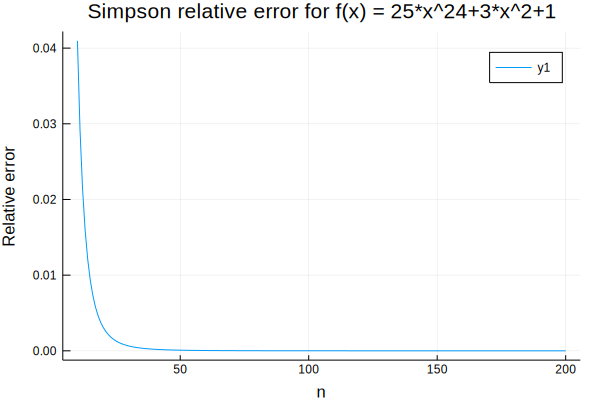

In [16]:
plot(simpson_f_results[:n], 
     map(x->parse(Float64,x), simpson_f_results[:Relative_error]), 
     xlabel="n",
     ylabel="Relative error",
     title="Simpson relative error for f(x) = 25*x^24+3*x^2+1"
)

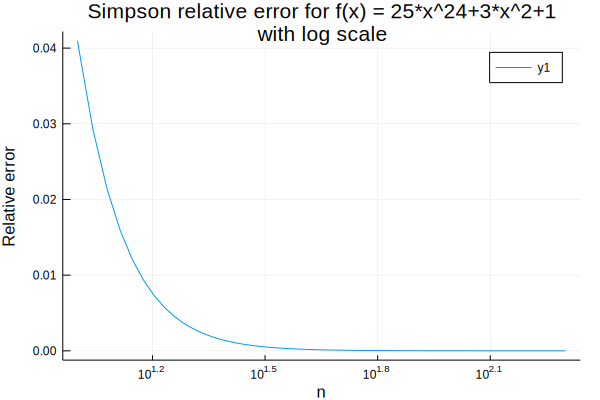

In [17]:
plot(simpson_f_results[:n], 
     map(x->parse(Float64,x), simpson_f_results[:Relative_error]), 
     xlabel="n",
     ylabel="Relative error",
     xaxis=:log,
     title="Simpson relative error for f(x) = 25*x^24+3*x^2+1\nwith log scale"
)

Wniosek: Im więcej punktów (większe n), tym błąd względny jest mniejszy 
(wynik kwadratury jest dokładniejszy), biorąc coraz większe n zmniejszamy znacząco błąd
w stosunku do poprzednich n. Niemniej jednak błąd względny dla n = 200 
jest o około 7 rzędów wielkości większy w stosunku do kwadratury Gaussa dla k = 13.
Zatem metoda Simpsona nie nadaje się do całkowania dużych wielomianów, lepiej jest użyć
kwadraturę Gaussa do tego.

In [18]:
simpson_g_results = DataFrame(n=Int[], Result=String[], Absolute_error=String[], Relative_error=String[])
g(x) = 4*x^3+3*x^2-2*x+1     # Integral on [-1,2] is equal to 24
exp_res = 24
a = -1
b = 2
println("Integral of g(x) = 4*x^3+3*x^2-2*x+1, on [", a, ",", b, "] is equal to ", exp_res, ".\n\n",
"Simpson results:\n")
min_n = 1
max_n = 200
for n in range(min_n,max_n)
    res = simpson_integral(g, a, b, n)
    push!(simpson_g_results, 
            [n, 
             @sprintf("%.10E", res), 
             @sprintf("%.10E", abs(exp_res-res)), 
             @sprintf("%.10E", abs(exp_res-res)/exp_res)]
    )
end
print(simpson_g_results)

Integral of g(x) = 4*x^3+3*x^2-2*x+1, on [-1,2] is equal to 24.

Simpson results:

200×4 DataFrame
│ Row │ n     │ Result           │ Absolute_error   │ Relative_error   │
│     │ Int64 │ String           │ String           │ String           │
├─────┼───────┼──────────────────┼──────────────────┼──────────────────┤
│ 1   │ 1     │ 2.4000000000E+01 │ 0.0000000000E+00 │ 0.0000000000E+00 │
│ 2   │ 2     │ 2.4000000000E+01 │ 0.0000000000E+00 │ 0.0000000000E+00 │
│ 3   │ 3     │ 2.4000000000E+01 │ 0.0000000000E+00 │ 0.0000000000E+00 │
│ 4   │ 4     │ 2.4000000000E+01 │ 0.0000000000E+00 │ 0.0000000000E+00 │
│ 5   │ 5     │ 2.4000000000E+01 │ 7.1054273576E-15 │ 2.9605947323E-16 │
│ 6   │ 6     │ 2.4000000000E+01 │ 0.0000000000E+00 │ 0.0000000000E+00 │
│ 7   │ 7     │ 2.4000000000E+01 │ 7.1054273576E-15 │ 2.9605947323E-16 │
│ 8   │ 8     │ 2.4000000000E+01 │ 0.0000000000E+00 │ 0.0000000000E+00 │
│ 9   │ 9     │ 2.4000000000E+01 │ 7.1054273576E-15 │ 2.9605947323E-16 │
│ 10  │ 10    │ 2.4000000

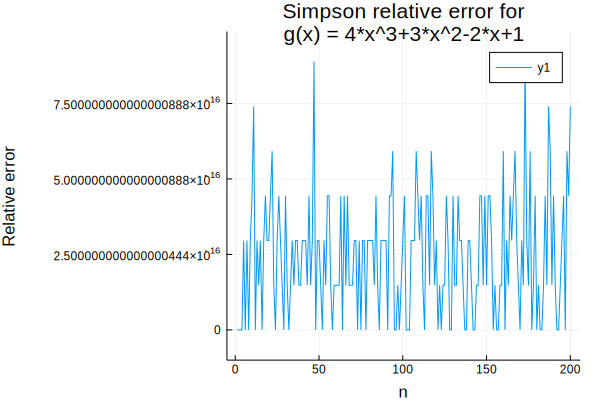

In [19]:
plot(simpson_g_results[:n], 
     map(x->parse(Float64,x), simpson_g_results[:Relative_error]), 
     xlabel="n",
     ylabel="Relative error",
     title="Simpson relative error for \ng(x) = 4*x^3+3*x^2-2*x+1"
)

Wniosek: Niezależnie od n błąd względny jest bardzo mały (poziomu reprezentacji).
Zatem prawdą jest, że metoda Simpsona jest poprawna dla wielomianów stopnia <= 3.